## Regression model using data from IMDB



In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
regr = linear_model.LinearRegression()

In [3]:
df = pd.read_csv('movies_IMDB.csv')

In [4]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
IMDB_scores = df[['imdb_score']]
IMDB_scores

,imdb_score
0,7.9
1,7.1
2,6.8
3,8.5
4,7.1
...,...
5038,7.7
5039,7.5
5040,6.3
5041,6.3


In [18]:
df.shape

(5043, 28)

In [19]:
x = df['movie_facebook_likes']

In [20]:
y = df['imdb_score']

In [21]:
X = x[:,np.newaxis] #set the data in array format
print(X)

[[33000]
 [    0]
 [85000]
 ...
 [   16]
 [  660]
 [  456]]


In [22]:
print(regr.fit(X,y)) #sets the parameters for the regression model
print(regr.coef_)    #shows the linear regression coeficient

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[1.43867394e-05]


In [31]:
m = regr.coef_[0]
b = regr.intercept_
y_p = m*X+b         #predicted value

In [25]:
print('y = {0} * x + {1}'.format(m,b)) # formats the linear regression as a linear equation

y = 1.4386739372803419e-05 * x + 6.3338635266320455


In [27]:
print(regr.predict(X)[0:5])  #predicting the first 5 records from dependent variable (X)

[6.80862593 6.33386353 7.55673637 8.69328878 6.33386353]


In [29]:
# start visualizing the data
import matplotlib.pyplot as plt

In [32]:
print('r^2 value is :', r2_score(y,y_p))

r^2 value is : 0.061032970753557625


Text(0, 0.5, 'IMDB Classification')

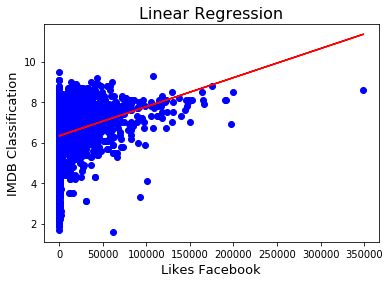

In [37]:
plt.scatter(x,y,color='blue')
plt.plot(x,y_p,color='red')
plt.title('Linear Regression', fontsize=16)
plt.xlabel('Likes Facebook', fontsize=13)
plt.ylabel('IMDB Classification', fontsize=13)